![image](https://user-images.githubusercontent.com/92948655/142497417-45196208-c7b6-4f91-9f05-02119bc6e03b.png)



# Contextualiza√ß√£o


Neste projeto utilizamos a base de dados [Credit Card Customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers), dispon√≠vel na plataforma Kaggle. Este dataset geralmente √© utilizado para a previs√£o de churning de clientes - processo no qual o cliente se torna desistente do consumo de algum servi√ßo.

O conjunto de dados original foi retirado do site [LEAPS](https://leaps.analyttica.com/), uma plataforma que disponibiliza diversos bancos de dados a fim de que os usu√°rios possam utiliz√°-los para praticar a resolu√ß√£o dos mais variados problemas de neg√≥cios.

Segundo informa√ß√µes disponilizadas pelo Kaggle em 22 de novembro de 2021, o dataset cont√©m dados sobre 10 mil clientes, dentre os quais: idade, sal√°rio, estado civil, limite de cr√©dito, etc. Vale acrescentar que este *dataset* foi disponibilizado por um dos usu√°rios da plataforma h√° cerca de um ano, em novembro de 2020.

Para estes dados, tem-se que aproximadamente 16,07% dos clientes desistiram do servi√ßo de cart√£o de cr√©dito.


# Objetivo da an√°lise

O objetivo da an√°lise √© tra√ßar um **perfil sobre os clientes que desistem do servi√ßo de cart√£o de cr√©dito prestado pelo banco em quest√£o**, observando quais s√£o os fatores (*features*) que possuem maior influ√™ncia sobre o *churn* de parte dos clientes.

A determina√ß√£o de quais colunas est√£o relacionadas com a desist√™ncia dos clientes pode auxiliar durante a aplica√ß√£o de modelos de *machine learning* sobre os dados.

# Dicion√°rio de dados

Nome da coluna|Descri√ß√£o dos dados|Tipo
:-------------|:-----------------|:---
CLIENTNUM|Identificador √∫nico para cada cliente da base de dados|Categ√≥rica
Attrition_Flag|Se o cliente est√° ou n√£o com uma conta ativa (se 1, a conta foi fechada, sen√£o 0)|Categ√≥rica
Customer_Age|Idade do cliente|Discreta
Gender|Sexo do cliente|Nominal
Dependent_count|N√∫mero de dependentes do cliente|Discreta
Education_Level|N√≠vel educacional do cliente|Ordinal
Marital_Status|Estado civil do cliente|Nominal
Income_Category|Categoria de renda na qual o cliente se encontra (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)|Intervalos
Card_Category|Tipo de cart√£o do cliente (Blue, Silver, Gold, Platinum)|Ordinal
Months_on_book|Per√≠odo de relacionamento do cliente com o banco (em meses)|Discreta
Total_Relationship_Count|Total de produtos do banco que o cliente possui|Discreta
Months_Inactive_12_mon|N√∫mero de meses que o cliente permaneceu inativo|Discreta
Contacts_Count_12_mon|N√∫mero de contatos nos √∫ltimos 12 meses|Discreta
Credit_Limit|Limite do cart√£o de cr√©dito|Cont√≠nua
Total_Revolving_Bal|M√©dia da quantidade gasta no cart√£o por m√™s|Cont√≠nua
Avg_Open_To_Buy|M√©dia de limite comprado nos √∫ltimos doze meses (reajuste do limite)|Cont√≠nua
Total_Amt_Chng_Q4_Q1|Compara√ß√£o entre o uso do cart√£o nos 4 √∫ltimos meses do ano com os 4 primeiros meses do ano (em quantia)|Cont√≠nua
Total_Trans_Amt|Total de transfer√™ncias nos √∫ltimos 12 meses (em quantia)|Cont√≠nua
Total_Trans_Ct|Total de transfer√™ncias nos √∫ltimos 12 meses (em n√∫mero de transa√ß√µes)|Discreta
Total_Ct_Chng_Q4_Q1|Compara√ß√£o entre o uso do cart√£o nos 4 √∫ltimos meses do ano com os 4 primeiros meses do ano (em n√∫mero de transa√ß√µes)|Cont√≠nua
Avg_Utilization_Ratio|Raz√£o m√©dia de uso do cart√£o (Rotativo/Limite de cr√©dito)|Cont√≠nua



# Importa√ß√£o de bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Carregando base de dados e visualizando atributos

In [2]:
df_original = pd.read_csv("BankChurners.csv", sep=',')
df_original

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [3]:
df_original.shape

(10127, 23)

In [4]:
df_original.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Em acordo com o que foi aconselhado por parte dos usu√°rios do Kaggle, na p√°gina de divulga√ß√£o dos dados, optamos aqui pela remo√ß√£o das duas √∫ltimas colunas, uma vez que n√£o apresentam grande import√¢ncia frente aos outros dados.

In [5]:
df = df_original.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [6]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [8]:
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[5 rows x 21 columns]

# An√°lise inicial da base

## Verifica√ß√£o de informa√ß√µes gerais sobre a base de dados:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Verifica√ß√£o de dados nulos:

In [10]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## Verifica√ß√£o mais detalhada sobre os dados para algumas das colunas:

### Status do cliente (*Attriction_Flag*):

In [11]:
df['Attrition_Flag'].value_counts(dropna = False)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

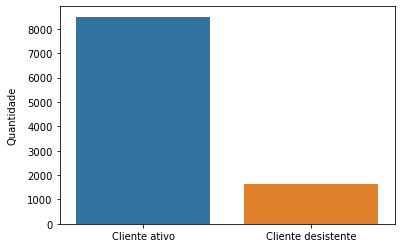

In [12]:
ax = sns.barplot(x=df['Attrition_Flag'].unique(), y=df['Attrition_Flag'].value_counts(dropna=False), data=df)
plt.ylabel("Quantidade", labelpad=10)
ax.set_xticklabels(["Cliente ativo", "Cliente desistente"], fontsize=10);

### Idade do cliente (*Customer_Age*)

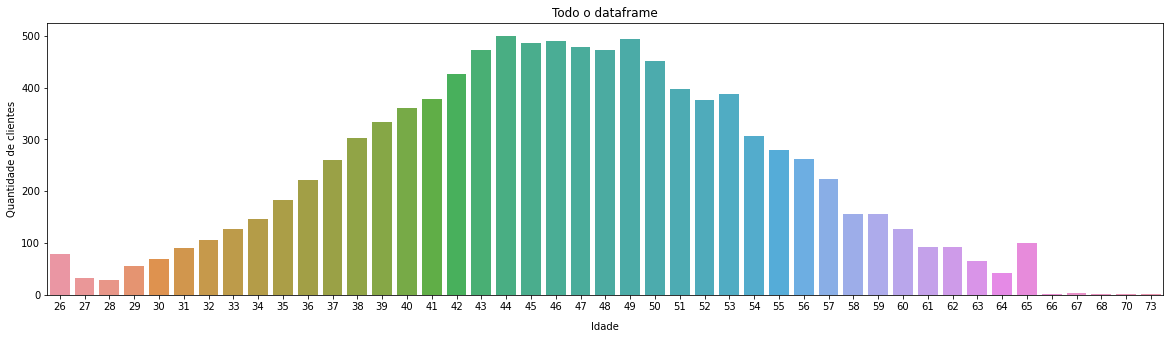

In [13]:
df_age = pd.DataFrame(df['Customer_Age'].value_counts(dropna=False)).reset_index()
plt.figure(figsize=(20,5))
ax = sns.barplot(x = df_age['index'], y = df_age['Customer_Age'], data = df_age)
plt.ylabel("Quantidade de clientes")
plt.title("Todo o dataframe")
plt.xlabel("Idade", labelpad=10);

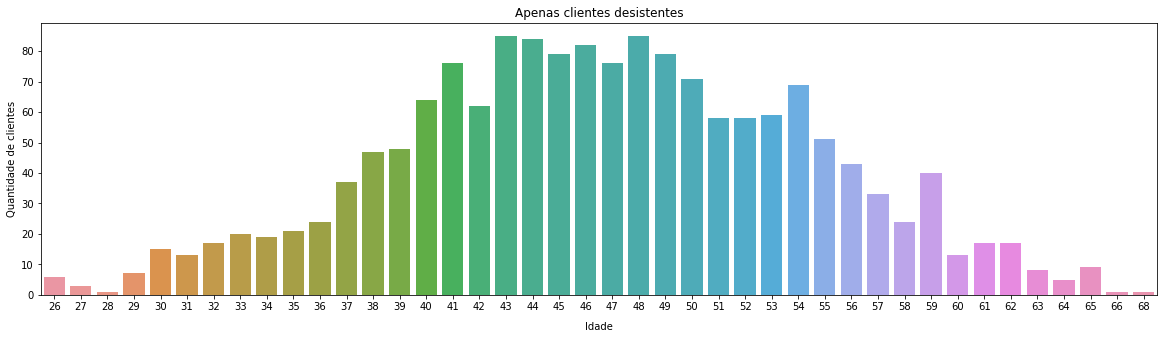

In [14]:
df_age_atr = pd.DataFrame(df[df['Attrition_Flag'] == 'Attrited Customer']['Customer_Age'].value_counts(dropna=False)).reset_index()
plt.figure(figsize=(20,5))
ax = sns.barplot(x = df_age_atr['index'], y = df_age_atr['Customer_Age'], data = df_age_atr)
plt.ylabel("Quantidade de clientes")
plt.title("Apenas clientes desistentes")
plt.xlabel("Idade", labelpad=10);

Agrupando por faixas et√°rias.

In [15]:
df_age_group = pd.DataFrame(df[['Customer_Age', 'Attrition_Flag']].copy())

In [16]:
classes = ["< 20","20-29", "30-39", "40-49", "50-59", "60-69", "70-79", ">= 80"]

df_age_group.loc[(df_age_group['Customer_Age'] < 20), 'classe'] = classes[0]
df_age_group.loc[(df_age_group['Customer_Age'] >= 20) & (df_age_group['Customer_Age'] < 30), 'classe'] = classes[1]
df_age_group.loc[(df_age_group['Customer_Age'] >= 30) & (df_age_group['Customer_Age'] < 40), 'classe'] = classes[2]
df_age_group.loc[(df_age_group['Customer_Age'] >= 40) & (df_age_group['Customer_Age'] < 50), 'classe'] = classes[3]
df_age_group.loc[(df_age_group['Customer_Age'] >= 50) & (df_age_group['Customer_Age'] < 60), 'classe'] = classes[4]
df_age_group.loc[(df_age_group['Customer_Age'] >= 60) & (df_age_group['Customer_Age'] < 70), 'classe'] = classes[5]
df_age_group.loc[(df_age_group['Customer_Age'] >= 70) & (df_age_group['Customer_Age'] < 80), 'classe'] = classes[6]
df_age_group.loc[(df_age_group['Customer_Age'] >= 80), 'classe'] = classes[7]

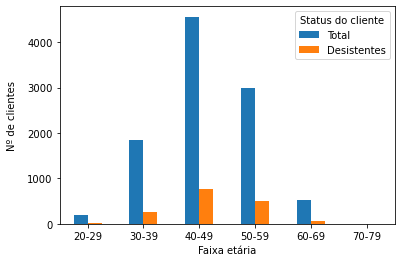

In [17]:
df_age_interval = pd.DataFrame(df_age_group['classe'].value_counts(dropna = False))
df_age_interval_atr = pd.DataFrame(df_age_group[df['Attrition_Flag'] == 'Attrited Customer']['classe'].value_counts(dropna = False))
df_age_interval_concat = pd.concat([df_age_interval, df_age_interval_atr], keys = ["Total","Desistentes"])
df_age_interval_concat.reset_index(inplace = True)
df_age_interval_concat.rename({"level_1":"Faixa et√°ria","level_0":"Status do cliente","classe":"Quantidade"}, axis=1, inplace = True)
df_age_interval_concat.pivot("Faixa et√°ria","Status do cliente","Quantidade").plot(y = ["Total","Desistentes"], kind = 'bar')
plt.ylabel('N¬∫ de clientes', labelpad=10)
plt.xticks(rotation = 0);

√â poss√≠vel observar que tanto em n√∫meros absolutos quanto em porcentagem, a faixa et√°ria que mais desistiu foi a de 40-49 anos, seguida da de 50-59 anos. H√° pouca necessidade de preocupa√ß√£o com a perda do p√∫blico jovem.

In [18]:
df_age_inside = (df_age_interval_atr/df_age_interval * 100).reset_index()
df_age_inside.rename(columns = {'index':'Faixa de idade','classe':'Taxa de desist√™ncia (%)'}, inplace = True)
df_age_inside.style.hide_index()

### G√™nero para cada cliente (*Gender*)

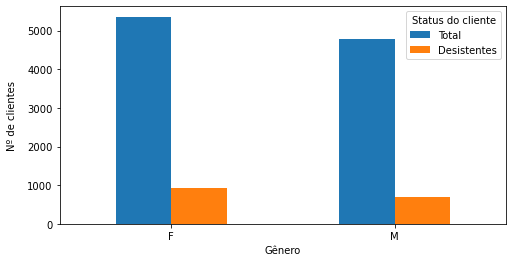

In [19]:
df_gender = pd.DataFrame(df['Gender'].value_counts(dropna = False))
df_gender_atr = pd.DataFrame(df[df['Attrition_Flag'] == 'Attrited Customer']['Gender'].value_counts(dropna = False))
df_gender_concat = pd.concat([df_gender, df_gender_atr], keys = ["Total","Desistentes"])
df_gender_concat.reset_index(inplace = True)
df_gender_concat.rename({"level_1":"G√™nero","level_0":"Status do cliente","Gender":"Quantidade"}, axis = 1, inplace = True)
df_gender_concat.pivot("G√™nero","Status do cliente","Quantidade").plot(y = ["Total","Desistentes"],kind = "bar", figsize = (8,4))
plt.ylabel('N¬∫ de clientes', labelpad=10)
plt.xticks(rotation = 0);

As mulheres representam a maioria dos clientes cadastrados no banco de dados e tamb√©m a maioria dos desistentes.

In [20]:
df_gender_inside = (df_gender_atr/df_gender*100).reset_index()
df_gender_inside.rename(columns = {'index':'G√™nero','Gender':'Taxa de desist√™ncia (%)'}, inplace = True)
df_gender_inside.style.hide_index()

### N√≠vel de educa√ß√£o para cada cliente (*Education_Level*)

In [21]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

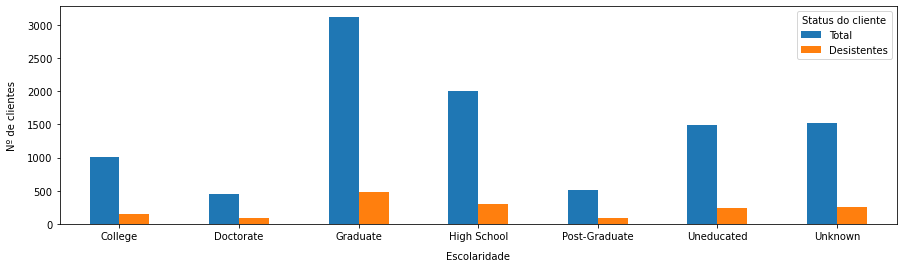

In [23]:
df_education = pd.DataFrame(df[df['Attrition_Flag'] == 'Attrited Customer']['Education_Level'].value_counts(dropna = False))
df_education_atr = pd.DataFrame(df['Education_Level'].value_counts(dropna = False))
df_education_concat = pd.concat([df_education, df_education_atr], keys = ["Desistentes","Total"])
df_education_concat.reset_index(inplace=True)
df_education_concat.rename({"level_1":"Escolaridade","level_0":"Status do cliente","Education_Level":"Quantidade"}, axis = 1, inplace = True)
df_education_concat.pivot("Escolaridade","Status do cliente","Quantidade").plot(y=["Total","Desistentes"], kind = 'bar', figsize = (15,4))
plt.ylabel('N¬∫ de clientes', labelpad=10)
plt.xlabel('Escolaridade', labelpad=10)
plt.xticks(rotation = 0);

A maior parte dos clientes cadastrados possuem n√≠vel educacional at√© a gradua√ß√£o. Dentre aqueles clientes que desistiram do servi√ßo, a maior parte tamb√©m possui at√© a gradua√ß√£o.

Verificando o n√≠vel de desist√™ncia dentro de cada grupo, em termos de n√≠vel educacional, podemos observar que dentre aqueles que possuem doutorado ou algum outro tipo de p√≥s-gradua√ß√£o, a taxa de churn em rela√ß√£o ao servi√ßo de cart√£o de cr√©dito, tende a ser maior.

In [24]:
df_ed_inside = (df_education_atr/df_education * 100).reset_index()
df_ed_inside.rename(columns = {'index':'N√≠vel Educacional','Education_Level':'Taxa de desist√™ncia (%)'}, inplace = True)
df_ed_inside.style.hide_index()

### N√∫mero de dependentes (*Dependent_count*)

In [25]:
df['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

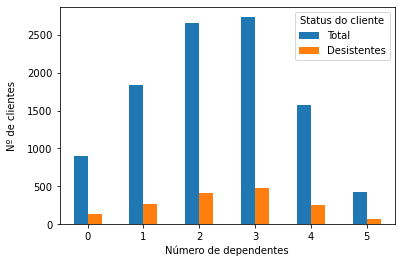

In [26]:
df_dependent = pd.DataFrame(df['Dependent_count'].value_counts(dropna = False))
df_dependent_atr = pd.DataFrame(df[df['Attrition_Flag'] == 'Attrited Customer']['Dependent_count'].value_counts(dropna = False))
df_dependent_concat = pd.concat([df_dependent, df_dependent_atr], keys = ["Total","Desistentes"])
df_dependent_concat.reset_index(inplace = True)
df_dependent_concat.rename({"level_1":"N√∫mero de dependentes","level_0":"Status do cliente","Dependent_count":"Quantidade"}, axis = 1, inplace = True)
df_dependent_concat.pivot("N√∫mero de dependentes","Status do cliente","Quantidade").plot(y = ["Total","Desistentes"], kind = 'bar')
plt.ylabel('N¬∫ de clientes', labelpad=10)
plt.xticks(rotation = 0);

Percentual de desistentes em cada grupo:

In [27]:
df_dp_inside = (df_dependent_atr/df_dependent * 100).reset_index()
df_dp_inside.rename(columns = {'index':'N¬∫ de Dependentes','Dependent_count':'Taxa de desist√™ncia (%)'}, inplace = True)
df_dp_inside.style.hide_index()

### Estado civil (*Marital_Status*)

In [28]:
df['Marital_Status'].value_counts(dropna=False)

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

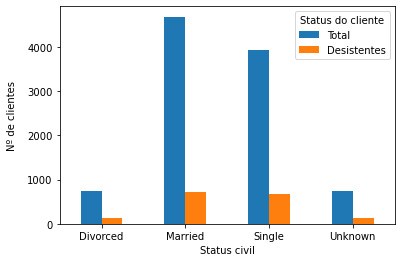

In [29]:
df_marital = pd.DataFrame(df['Marital_Status'].value_counts(dropna=False))
df_marital_atr = pd.DataFrame(df[df['Attrition_Flag'] == 'Attrited Customer']['Marital_Status'].value_counts(dropna=False))
df_marital_concat = pd.concat([df_marital, df_marital_atr], keys = ["Total","Desistentes"])
df_marital_concat.reset_index(inplace=True)
df_marital_concat.rename({"level_1":"Status civil","level_0":"Status do cliente","Marital_Status":"Quantidade"}, axis = 1, inplace = True)
df_marital_concat.pivot("Status civil","Status do cliente","Quantidade").plot(y=["Total","Desistentes"], kind = 'bar');
plt.ylabel('N¬∫ de clientes', labelpad=10)
plt.xticks(rotation = 0);

Percentual de desistentes em cada grupo:

In [ ]:
df_marital_inside = (df_marital_atr/df_marital * 100).reset_index()
df_marital_inside.rename(columns = {'index':'Estado Civil','Marital_Status':'Taxa de desist√™ncia (%)'}, inplace = True)
df_marital_inside.style.hide_index()

### Faixa de renda dos clientes (*Income_Category*)

In [30]:
df['Income_Category'].value_counts(dropna=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

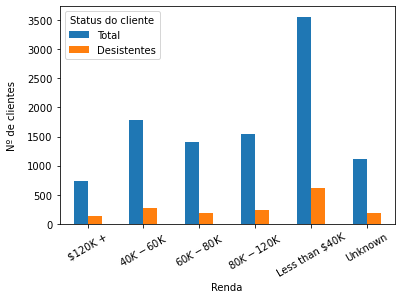

In [31]:
df_inc = pd.DataFrame(df['Income_Category'].value_counts(dropna = False))
df_inc_atr = pd.DataFrame(df[df['Attrition_Flag'] == 'Attrited Customer']['Income_Category'].value_counts(dropna = False))
df_inc_concat = pd.concat([df_inc, df_inc_atr], keys = ["Total", "Desistentes"])
df_inc_concat.reset_index(inplace = True)
df_inc_concat.rename({"level_1":"Renda","level_0":"Status do cliente","Income_Category":"Quantidade"}, axis = 1, inplace = True)
df_inc_concat.pivot("Renda","Status do cliente","Quantidade").plot(y = ["Total","Desistentes"], kind = 'bar')
plt.ylabel('N¬∫ de clientes', labelpad=10)
plt.xticks(rotation = 30);

Os ind√≠ces de desist√™ncia s√£o mais altos entre pessoas que ganham menos de 40K e mais de 120K.

In [32]:
df_inc_inside = (df_inc_atr/df_inc * 100).reset_index()
df_inc_inside.rename(columns = {'index':'Faixa de Renda','Income_Category':'Taxa de desist√™ncia (%)'}, inplace = True)
df_inc_inside.style.hide_index()

### Categoria do cart√£o para cada cliente (*Card_Category*)

In [33]:
df['Card_Category'].value_counts(dropna=False)

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

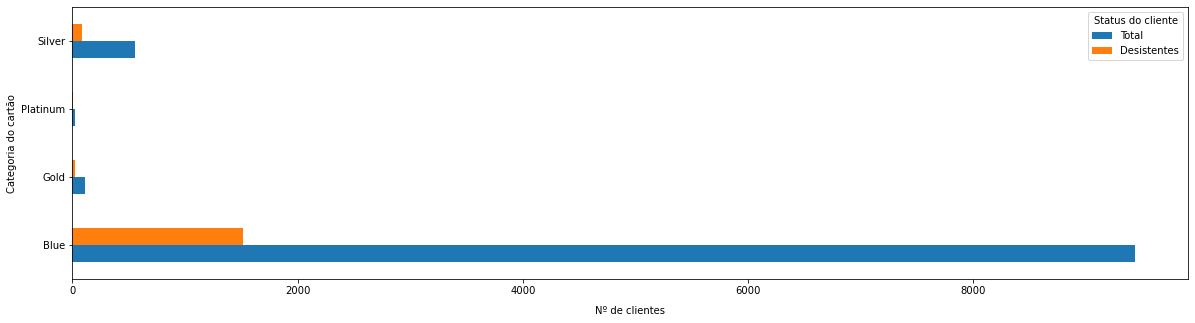

In [34]:
df_card = pd.DataFrame(df['Card_Category'].value_counts(dropna = False))
df_card_atr = pd.DataFrame(df[df['Attrition_Flag'] == 'Attrited Customer']['Card_Category'].value_counts(dropna = False))
df_card_concat = pd.concat([df_card, df_card_atr], keys = ["Total", "Desistentes"])
df_card_concat.reset_index(inplace = True)
df_card_concat.rename({"level_1":"Categoria do cart√£o","level_0":"Status do cliente","Card_Category":"Quantidade"}, axis = 1, inplace = True)
df_card_concat.pivot("Categoria do cart√£o","Status do cliente","Quantidade").plot(y = ["Total","Desistentes"], kind = 'barh', figsize = (20,5))
plt.xlabel('N¬∫ de clientes', labelpad=10);

Embora poucas pessoas possuam o cart√£o platinum, √© nesta categoria que encontramos a maior taxa de desist√™ncia, como vemos na analise de cada grupo a seguir.

In [35]:
df_card_inside = (df_card_atr/df_card * 100).reset_index()
df_card_inside.rename(columns = {'index':'Categoria do Cart√£o','Card_Category':'Taxa de desist√™ncia (%)'}, inplace = True)
df_card_inside.style.hide_index()

### Tempo de relacionamento para cada cliente com o banco (*Months_on_book*)

Observamos que possivelmente houve um evento pontual de marketing ou de lan√ßamento de produtos h√° 36 meses, quando houve a maior entrada de clientes no banco. Tamb√©m vemos que n√£o existem clientes com menos de 12 meses de relacionamento com o banco e que os mais antigos possuem cerca de 5 anos de relacionamento.

In [36]:
df_book = pd.DataFrame(df['Months_on_book'].value_counts(dropna=False))
df_book.reset_index(inplace = True)

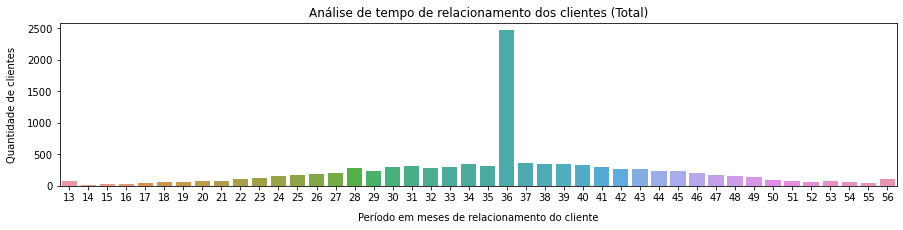

In [37]:
plt.figure(figsize = (15,3))
ax = sns.barplot(x = df_book['index'], y = df_book['Months_on_book'], data = df_book)
plt.ylabel("Quantidade de clientes", labelpad=10)
plt.xlabel("Per√≠odo em meses de relacionamento do cliente", labelpad=10)
plt.title("An√°lise de tempo de relacionamento dos clientes (Total)");

In [38]:
df_book_atr = pd.DataFrame(df[df['Attrition_Flag'] == 'Attrited Customer']['Months_on_book'].value_counts(dropna = False))
df_book_atr.reset_index(inplace = True)

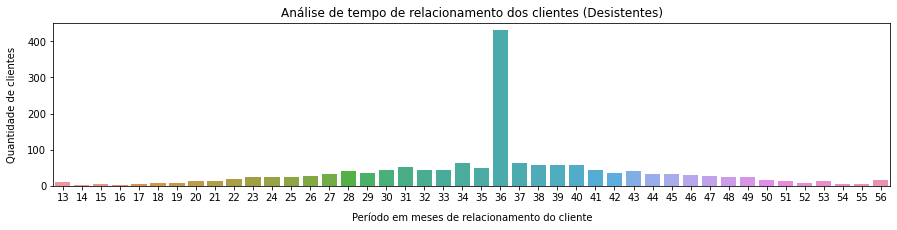

In [39]:
plt.figure(figsize = (15,3))
ax = sns.barplot(x = df_book['index'], y = df_book_atr['Months_on_book'], data= df_book_atr)
plt.ylabel("Quantidade de clientes", labelpad=10)
plt.xlabel("Per√≠odo em meses de relacionamento do cliente", labelpad=10)
plt.title("An√°lise de tempo de relacionamento dos clientes (Desistentes)");

**Organizando o tempo de relacionamento por semestres:**

In [40]:
df_book['semestre'] = (df_book['index']/6).apply(math.ceil)
df_book.drop(columns = "index", inplace = True)
df_book = pd.DataFrame(df_book.groupby('semestre')['Months_on_book'].sum()).reset_index()

In [41]:
df_book_atr['semestre'] = (df_book_atr['index']/6).apply(math.ceil)
df_book_atr.drop(columns = 'index', inplace = True)
df_book_atr = pd.DataFrame(df_book_atr.groupby('semestre')['Months_on_book'].sum()).reset_index()

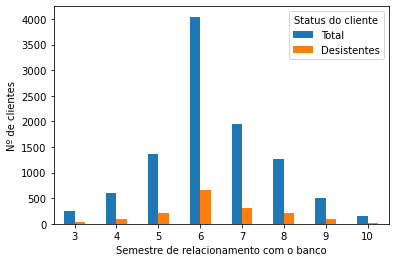

In [42]:
df_book_concat = pd.concat([df_book, df_book_atr], keys=["Total", "Desistentes"])
df_book_concat.reset_index(inplace = True)
df_book_concat.rename({"semestre":"Semestre de relacionamento com o banco","level_0":"Status do cliente", "Months_on_book":"Quantidade"}, axis = 1, inplace = True)
df_book_concat.pivot("Semestre de relacionamento com o banco","Status do cliente","Quantidade").plot(y = ["Total", "Desistentes"], kind = 'bar')
plt.ylabel('N¬∫ de clientes')
plt.xticks(rotation=0);

### Meses de inatividade dos clientes (*Months_Inactive_12_mon*)

In [43]:
df['Months_Inactive_12_mon'].value_counts(normalize = True)

3    0.379777
2    0.324084
1    0.220500
4    0.042954
5    0.017577
6    0.012244
0    0.002864
Name: Months_Inactive_12_mon, dtype: float64

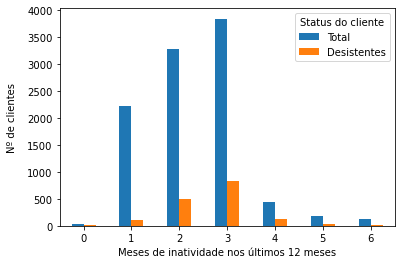

In [44]:
df_inac = pd.DataFrame(df['Months_Inactive_12_mon'].value_counts(dropna=False))
df_inac_atr = pd.DataFrame(df[df['Attrition_Flag'] == 'Attrited Customer']['Months_Inactive_12_mon'].value_counts(dropna = False))
df_inac_concat = pd.concat([df_inac, df_inac_atr], keys = ["Total","Desistentes"])
df_inac_concat.reset_index(inplace = True)
df_inac_concat.rename({"level_1":"Meses de inatividade nos √∫ltimos 12 meses","level_0":"Status do cliente","Months_Inactive_12_mon":"Quantidade"}, axis = 1, inplace = True)
df_inac_concat.pivot("Meses de inatividade nos √∫ltimos 12 meses","Status do cliente","Quantidade").plot(y = ["Total", "Desistentes"], kind = 'bar')
plt.ylabel('N¬∫ de clientes', labelpad=10)
plt.xticks(rotation = 0);

Metade das pessoas que n√£o ficaram inativas desistiram. Em termos absolutos, apenas 15 pessoas n√£o ficaram inativas nos √∫ltimos meses.

In [45]:
df_inac_inside = (df_inac_atr/df_inac * 100).reset_index()
df_inac_inside.rename(columns = {'index':'Meses Inativos','Months_Inactive_12_mon':'Taxa de desist√™ncia (%)'}, inplace = True)
df_inac_inside.style.hide_index()

### N√∫mero de contatos do cliente com o banco (*Contacts_Count_12_mon*)

In [46]:
df['Contacts_Count_12_mon'].value_counts()

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

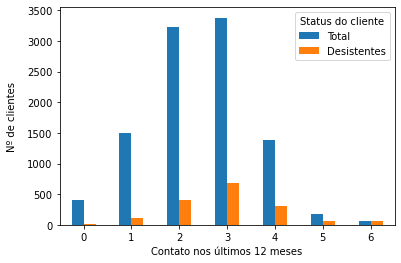

In [47]:
df_ctc = pd.DataFrame(df['Contacts_Count_12_mon'].value_counts(dropna=False))
df_ctc_atr = pd.DataFrame(df[df['Attrition_Flag'] == 'Attrited Customer']['Contacts_Count_12_mon'].value_counts(dropna=False))
df_ctc_concat = pd.concat([df_ctc, df_ctc_atr], keys = ["Total", "Desistentes"])
df_ctc_concat.reset_index(inplace = True)
df_ctc_concat.rename({"level_1":"Contato nos √∫ltimos 12 meses","level_0":"Status do cliente","Contacts_Count_12_mon":"Quantidade"}, axis = 1, inplace = True)
df_ctc_concat.pivot("Contato nos √∫ltimos 12 meses","Status do cliente","Quantidade").plot(y = ["Total","Desistentes"], kind = 'bar')
plt.ylabel('N¬∫ de clientes', labelpad=10)
plt.xticks(rotation = 0);

Quanto mais contatos existem entre banco e cliente, maior √© a probabilidade de desist√™ncia.

In [48]:
df_ctc_inside = (df_ctc_atr/df_ctc * 100).reset_index()
df_ctc_inside.rename(columns = {'index':'N¬∫ de Contatos','Contacts_Count_12_mon':'Taxa de desist√™ncia (%)'}, inplace = True)
df_ctc_inside.style.hide_index()

### Limite de cr√©dito (*Credit_Limit*)

In [49]:
df_credit = pd.DataFrame(df['Credit_Limit'].copy())
df_credit['Faixas'] = pd.cut(df_credit['Credit_Limit'], 6)
df_credit = df_credit.drop(columns="Credit_Limit")

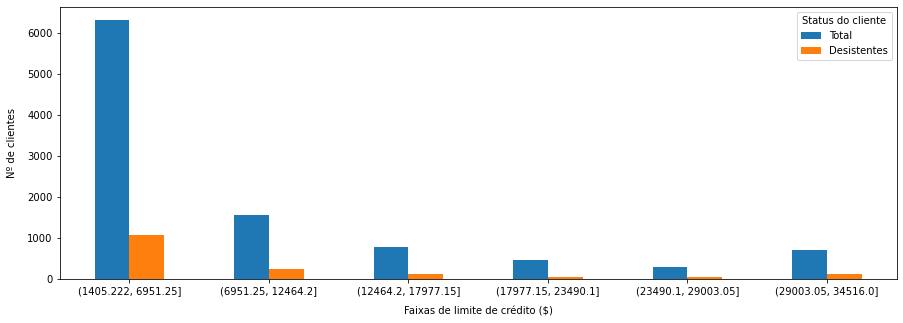

In [50]:
df_credit_tot = pd.DataFrame(df_credit['Faixas'].value_counts(dropna=False))
df_credit_atr = pd.DataFrame(df_credit[df['Attrition_Flag'] == 'Attrited Customer']['Faixas'].value_counts(dropna=False))
df_credit_concat = pd.concat([df_credit_tot, df_credit_atr], keys = ["Total","Desistentes"])
df_credit_concat.reset_index(inplace = True)
df_credit_concat.rename({"level_1":"Faixas","level_0":"Status do cliente","Faixas":"Quantidade"}, axis = 1, inplace = True)
df_credit_concat.pivot("Faixas","Status do cliente","Quantidade").plot(y=["Total","Desistentes"], kind = 'bar',figsize = (15,5))
plt.xlabel('Faixas de limite de cr√©dito ($)', labelpad=10)
plt.ylabel('N¬∫ de clientes', labelpad=10)
plt.xticks(rotation = 0);

### M√©dia de utiliza√ß√£o do cart√£o por cliente (*Avg_Utilization_Ratio*)

In [51]:
df_utz = pd.DataFrame(df[['Attrition_Flag',"Avg_Utilization_Ratio"]].copy())

uso = ["0 - 10","11 - 20", "21 - 30", "31 - 40", "41 - 50", "51 - 60", "61 - 70", "71 - 80", "81 - 90", "91 - 100"]

df_utz.loc[(df_utz['Avg_Utilization_Ratio']<=0.1),'uso']=uso[0]
df_utz.loc[(df_utz['Avg_Utilization_Ratio']>0.1) & (df_utz['Avg_Utilization_Ratio']<=0.2),'uso'] = uso[1]
df_utz.loc[(df_utz['Avg_Utilization_Ratio']>0.2) & (df_utz['Avg_Utilization_Ratio']<=0.3),'uso'] = uso[2]
df_utz.loc[(df_utz['Avg_Utilization_Ratio']>0.3) & (df_utz['Avg_Utilization_Ratio']<=0.4),'uso'] = uso[3]
df_utz.loc[(df_utz['Avg_Utilization_Ratio']>0.4) & (df_utz['Avg_Utilization_Ratio']<=0.5),'uso'] = uso[4]
df_utz.loc[(df_utz['Avg_Utilization_Ratio']>0.5) & (df_utz['Avg_Utilization_Ratio']<=0.6),'uso'] = uso[5]
df_utz.loc[(df_utz['Avg_Utilization_Ratio']>0.6) & (df_utz['Avg_Utilization_Ratio']<=0.7),'uso'] = uso[6]
df_utz.loc[(df_utz['Avg_Utilization_Ratio']>0.7) & (df_utz['Avg_Utilization_Ratio']<=0.8),'uso'] = uso[7]
df_utz.loc[(df_utz['Avg_Utilization_Ratio']>0.8) & (df_utz['Avg_Utilization_Ratio']<=0.9),'uso'] = uso[8]
df_utz.loc[(df_utz['Avg_Utilization_Ratio']>0.9),'uso'] = uso[9]

In [52]:
df_utz.head()

Attrition_Flag  Avg_Utilization_Ratio      uso
0  Existing Customer                  0.061   0 - 10
1  Existing Customer                  0.105  11 - 20
2  Existing Customer                  0.000   0 - 10
3  Existing Customer                  0.760  71 - 80
4  Existing Customer                  0.000   0 - 10

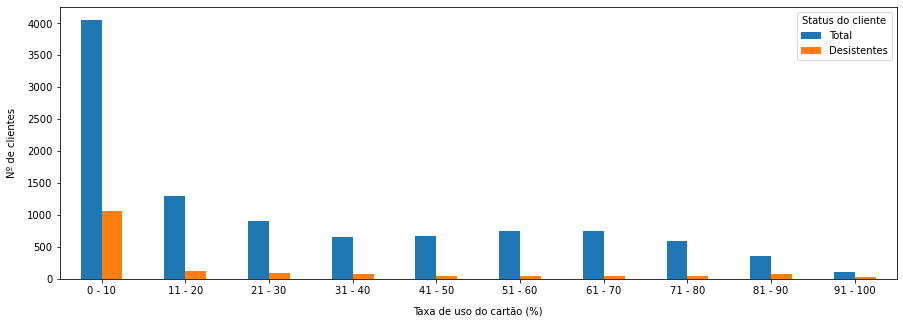

In [53]:
df_utz_tot = pd.DataFrame(df_utz['uso'].value_counts(dropna = False))
df_utz_atr = pd.DataFrame(df_utz[df['Attrition_Flag'] == 'Attrited Customer']['uso'].value_counts(dropna = False))
df_utz_concat = pd.concat([df_utz_tot, df_utz_atr], keys = ["Total", "Desistentes"])
df_utz_concat.reset_index(inplace = True)
df_utz_concat.rename(columns = {"level_0":"Status do cliente","level_1":"% de uso do cart√£o","uso":"Quantidade"}, inplace = True)
df_utz_concat.pivot("% de uso do cart√£o","Status do cliente","Quantidade").plot(y = ["Total","Desistentes"], kind = 'bar',figsize = (15,5))
plt.xlabel('Taxa de uso do cart√£o (%)', labelpad=10)
plt.ylabel('N¬∫ de clientes', labelpad=10)
plt.xticks(rotation = 0);

Vemos que as maiores taxas de desist√™ncia dos clientes est√£o nos grupos daqueles que usam entre 0 e 10% do limite de cr√©dito e daqueles que usam mais de 90% do limite do cart√£o:

In [54]:
df_utz_inside = (df_utz_atr/df_utz_tot * 100).reset_index()
df_utz_inside.rename(columns = {'index':'Taxa de uso do cart√£o (%)','uso':'Taxa de desist√™ncia (%)'}, inplace = True)
df_utz_inside.style.hide_index()

Algumas infer√™ncias a respeito desta observa√ß√£o:
- Os clientes que utilizam pouco do limite do cart√£o (0 - 10%) n√£o desejam continuar pagando anuidade ou outras taxas e por isso realizam o cancelamento;
- Os clientes que utilizam muito do limite do cart√£o (91 - 100%) por quest√µes de endividamento, optam pelo cancelamento do cart√£o.

### Rela√ß√£o entre a quantidade gasta no 4¬∫ semestre e no 1¬∫ semestre por cada cliente (*Total_Amt_Chng_Q4_Q1*)

In [55]:
df_q4q1 = pd.DataFrame(df['Total_Amt_Chng_Q4_Q1'].copy())
df_q4q1.loc[df_q4q1['Total_Amt_Chng_Q4_Q1'] > 1, 'classe'] = 'Aumentou gasto'
df_q4q1.loc[df_q4q1['Total_Amt_Chng_Q4_Q1'] == 1, 'classe'] = 'Manteve gasto'
df_q4q1.loc[df_q4q1['Total_Amt_Chng_Q4_Q1'] < 1, 'classe'] = 'Diminuiu gasto'

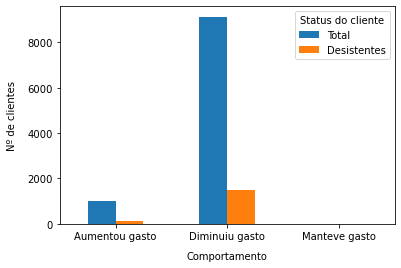

In [56]:
df_q4q1_tot = pd.DataFrame(df_q4q1['classe'].value_counts(dropna = False))
df_q4q1_atr = pd.DataFrame(df_q4q1[df['Attrition_Flag'] == 'Attrited Customer']['classe'].value_counts(dropna=False))
df_q4q1_concat = pd.concat([df_q4q1_tot, df_q4q1_atr], keys = ['Total', 'Desistentes'])
df_q4q1_concat.reset_index(inplace = True)
df_q4q1_concat.rename({"level_0":"Status do cliente", "level_1":"Comportamento", "classe":"Quantidade"}, axis = 1, inplace = True)
df_q4q1_concat.pivot("Comportamento","Status do cliente","Quantidade").plot(y = ["Total", "Desistentes"], kind = "bar")
plt.ylabel('N¬∫ de clientes', labelpad = 10)
plt.xlabel('Comportamento',labelpad= 10)
plt.xticks(rotation = 0);

Visualizando um pouco mais de perto tais rela√ß√µes:

In [57]:
df_q4q1_concat

Status do cliente   Comportamento  Quantidade
0             Total  Diminuiu gasto        9127
1             Total  Aumentou gasto         993
2             Total   Manteve gasto           7
3       Desistentes  Diminuiu gasto        1485
4       Desistentes  Aumentou gasto         142

**At√© aqui, podemos inferir que os clientes desistentes possuem o seguinte perfil:**

                         ---- preencher com as caracter√≠sticas nos pontinhos depois ----
- A 
- B
- C

# An√°lises estat√≠sticas

In [58]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

Com o objetivo de entendermos melhor quais vari√°veis est√£o fortemente correlacionadas entre si n√£o s√≥ para a base de dados como um todo, mas tamb√©m para os clientes desistentes, montamos um dataframe √† parte:

In [59]:
df_atr = df[df['Attrition_Flag'] == 'Attrited Customer']

In [60]:
df_atr.head(3)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
21  708508758  Attrited Customer            62      F                0   
39  708300483  Attrited Customer            66      F                0   
51  779471883  Attrited Customer            54      F                1   

   Education_Level Marital_Status Income_Category Card_Category  \
21        Graduate        Married  Less than $40K          Blue   
39       Doctorate        Married         Unknown          Blue   
51        Graduate        Married  Less than $40K          Blue   

    Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
21              49  ...                       3                      3   
39              56  ...                       4                      3   
51              40  ...                       3                      1   

    Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
21        1438.3                    0           1438.3                 1.047   
39        7882.0                  605           7277.0                 1.052   
51        1438.3                  808            630.3                 0.997   

    Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
21              692              16                0.600   
39              704              16                0.143   
51              705              19                0.900   

    Avg_Utilization_Ratio  
21                  0.000  
39                  0.077  
51                  0.562  

[3 rows x 21 columns]

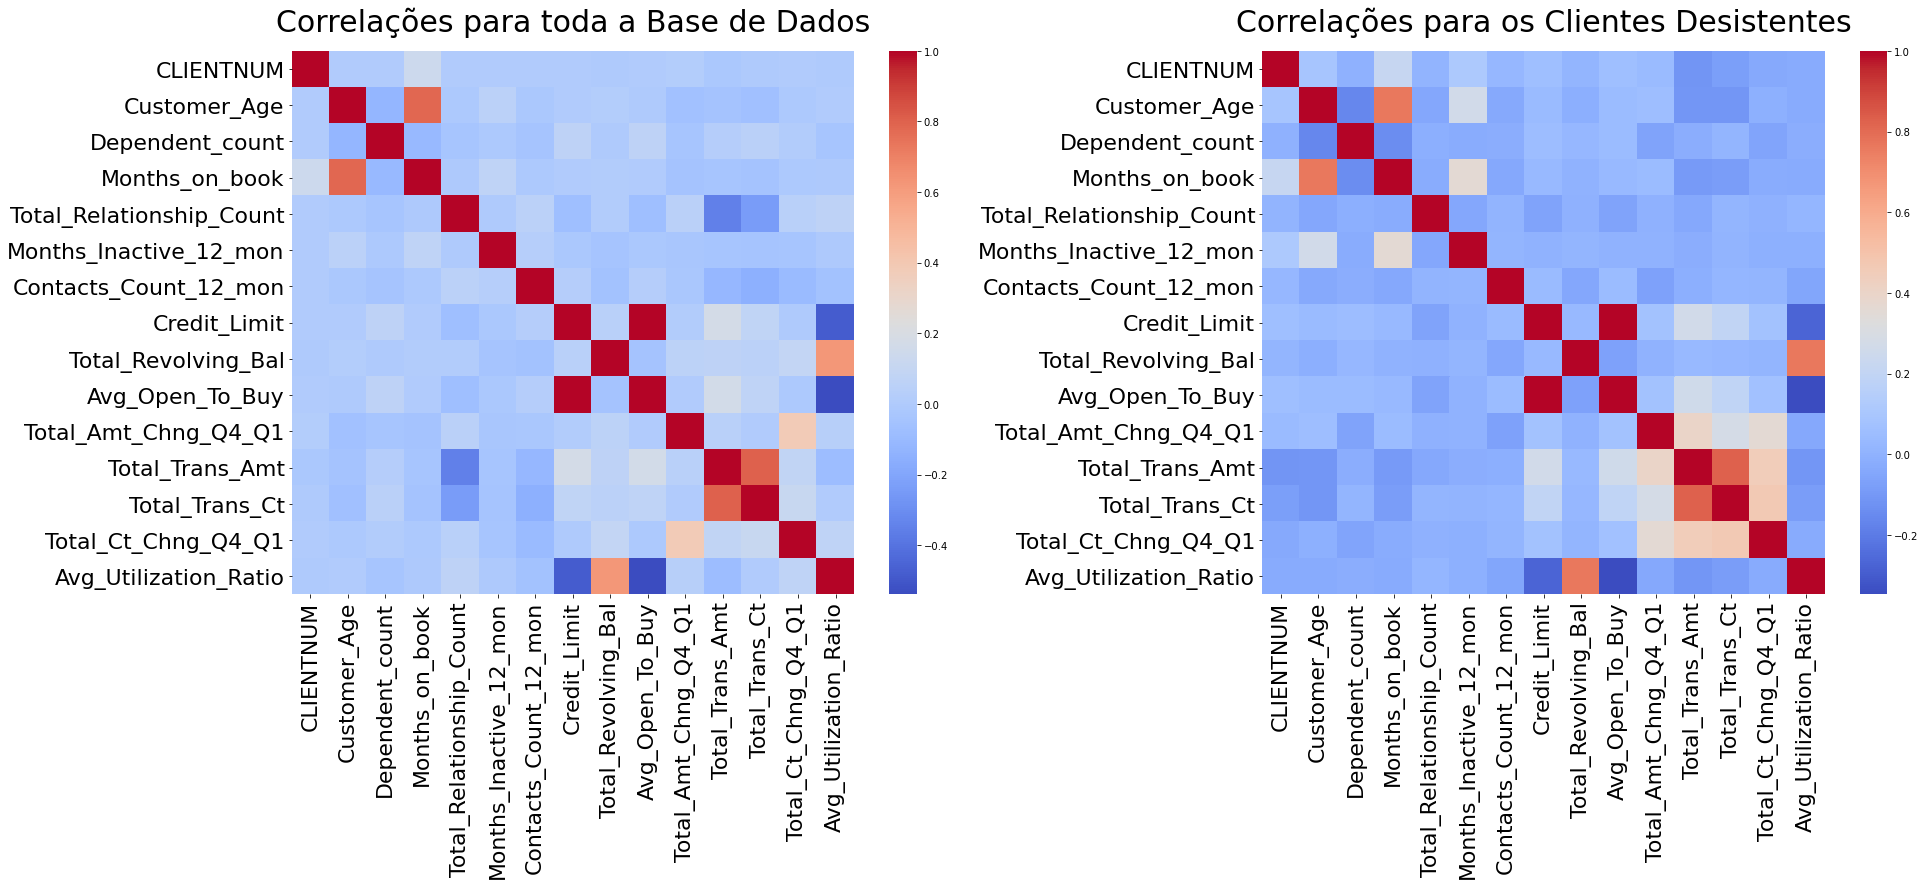

In [61]:
fig, axes = plt.subplots(1, 2, figsize = (30, 10))
sns.heatmap(df.corr(), cmap = 'coolwarm',ax = axes[0]);
sns.heatmap(df_atr.corr(), cmap = 'coolwarm', ax = axes[1])
axes[0].set_title('Correla√ß√µes para toda a Base de Dados', fontsize = 30, pad = 20)
axes[1].set_title('Correla√ß√µes para os Clientes Desistentes', fontsize = 30, pad = 20)
axes[0].tick_params(labelsize = 22)
axes[1].tick_params(labelsize = 22)
fig.subplots_adjust(wspace = 0.38);

Tanto para toda a base de clientes, quanto para a parte desistente, foi poss√≠vel observar que a coluna `Avg_Utilization_Ratio` est√° fortemente correlacionada de forma negativa com as colunas `Credit_Limit` e `Avg_Open_To_Buy`.

Tendo em vista que, infelizmente, os *heatmaps* n√£o trouzeram tantas informa√ß√µes, buscamos confeccionar gr√°ficos com base em algumas hip√≥teses de correla√ß√£o:

In [ ]:
#Podemos utilizar as vari√°veis categ√≥ricas como cores nos gr√°ficos de dispers√£o
categoricas = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Card_Category',
               'Income_Category']
                 

#E criar os gr√°ficos de dispers√£o correlacionando as vari√°veis quantitativas
quantitativas = ['Customer_Age','Dependent_count','Total_Relationship_Count','Months_on_book',
                 'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit',
                 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                 'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

relacoes = [('Avg_Utilization_Ratio', 'Credit_Limit'), ('Avg_Open_To_Buy', 'Credit_Limit'),
           ('Credit_Limit','Card_Category'), ('Months_on_book','Credit_Limit'),
           ('Income_Category','Credit_Limit'), ('Income_Category','Education_Level'),
           ('Education_Level','Credit_Limit')]

![image](https://user-images.githubusercontent.com/92948655/142491917-27daa8a9-3508-45c6-950c-4f56dd76dacf.png)

### Rela√ß√£o entre taxa de utiliza√ß√£o do cart√£o, limite de cr√©dito e faixa de renda do cliente:

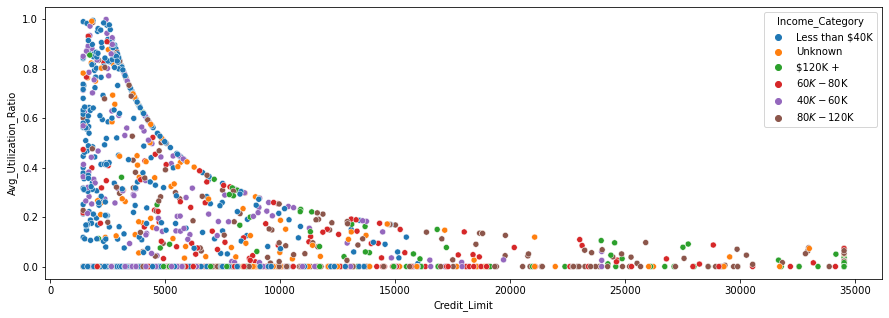

In [62]:
plt.figure(figsize=(15,5))
quantitativa_y, quantitativa_x = ('Avg_Utilization_Ratio', 'Credit_Limit') 
categoria = 'Income_Category'
sns.scatterplot(x = quantitativa_x, y = quantitativa_y, data = df_atr, hue = categoria)
plt.ylabel(quantitativa_y)
plt.xlabel(quantitativa_x);

**Conclus√£o:** Dentre os clientes desistentes do servi√ßo de cart√£o de cr√©dito, aqueles que possuem renda menor que 40 mil d√≥lares tendem a utilizar o cart√£o com maior rapidez, uma vez que seu limite de cr√©dito √© baixo e portanto, facilmente comprometido. 

**Faixa de renda** e **limite de cr√©dito**, elevam a taxa de utiliza√ß√£o do cart√£o, relacionada ao n√≠vel do cancelamento, como vimos durante as an√°lises das colunas.

**Pensar melhor sobre a an√°lise a seguir depois:** üö®

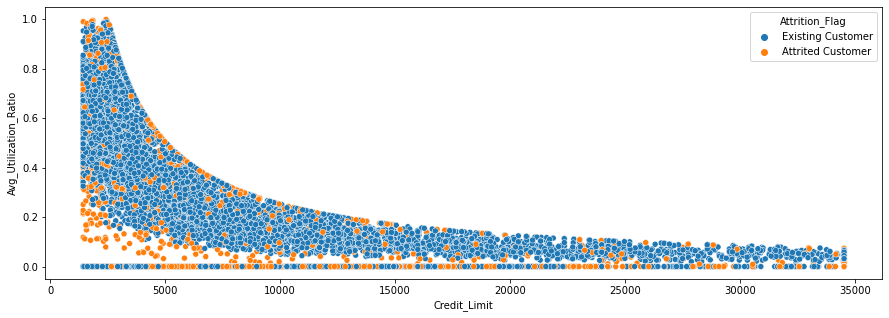

In [64]:
plt.figure(figsize=(15,5))
quantitativa_y, quantitativa_x = ('Avg_Utilization_Ratio', 'Credit_Limit') 
categoria = 'Income_Category'
sns.scatterplot(x = quantitativa_x, y=quantitativa_y, data = df, hue = 'Attrition_Flag')
plt.ylabel(quantitativa_y)
plt.xlabel(quantitativa_x);

Observamos que diversos clientes desistentes est√£o com m√©dia de utiliza√ß√£o igual a 0. O percentual de clientes desistentes que n√£o estavam utilizando o cart√£o √© de:

In [65]:
df_atr[df_atr['Avg_Utilization_Ratio'] == 0].count()[0]/df_atr.count()[0]*100

54.88629379225568

### Rela√ß√£o entre desist√™ncia do servi√ßo, categoria do cart√£o e taxa de utiliza√ß√£o:

Avaliamos, **dentre os clientes desistentes**, como √© a distribui√ß√£o de categorias para o cart√£o de cr√©dito:

In [102]:
df_atr_card = pd.DataFrame(df[df['Attrition_Flag'] == 'Attrited Customer'].groupby('Card_Category')['Credit_Limit'].describe()['count'])
df_atr_card.reset_index(inplace = True)
df_atr_card.rename(columns = {'Card_Category': 'Categoria do Cart√£o', 'count': 'N¬∫ de clientes'}, inplace = True)
df_atr_card.set_index('Categoria do Cart√£o', inplace = True)
df_atr_card

N¬∫ de clientes
Categoria do Cart√£o                
Blue                         1519.0
Gold                           21.0
Platinum                        5.0
Silver                         82.0

**Os clientes que mais aderiram ao cancelamento do servi√ßo, possuem cart√µes da categoria Blue.**

Vimos anteriormente que os clientes que possuem taxas de utiliza√ß√£o do cart√£o nos intervalos entre 0 - 10% e 90-100%, possuem forte tend√™ncia de cancelamento. Levando em considera√ß√£o esta observa√ß√£o, vamos analisar a rela√ß√£o, dentre os clientes desistentes, da taxa de uso e categoria do cart√£o: 

**Para uma m√©dia de utiliza√ß√£o menor do que 10%:**

In [106]:
df_avg10_card = pd.DataFrame(df_atr[df_atr['Avg_Utilization_Ratio'] < 0.1].groupby('Card_Category')['Avg_Utilization_Ratio'].count())
df_avg10_card.reset_index(inplace = True)
df_avg10_card.rename(columns = {'Card_Category': 'Categoria do Cart√£o', 'Avg_Utilization_Ratio': 'N¬∫ de clientes'}, inplace = True)
df_avg10_card.set_index('Categoria do Cart√£o', inplace = True)
df_avg10_card

N¬∫ de clientes
Categoria do Cart√£o                
Blue                            968
Gold                             20
Platinum                          5
Silver                           75

Percentualmente, por categoria de cart√£o:

In [109]:
df_avg10_percentual = df_avg10_card/df_atr_card * 100
df_avg10_percentual.rename(columns = {'N¬∫ de clientes': 'Taxa de Cancelamento (%)'}, inplace = True)
df_avg10_percentual

Taxa de Cancelamento (%)
Categoria do Cart√£o                          
Blue                                63.726136
Gold                                95.238095
Platinum                           100.000000
Silver                              91.463415

Apesar de a maior parte dos clientes que cancelaram, estarem na categoria Blue, a taxa de cancelamento dentre os outros grupos de cart√£o tamb√©m segue alta para clientes que utilizam menos de 10% do limite do cart√£o.

**Para uma m√©dia de utiliza√ß√£o maior do que 90%:**

In [110]:
df_avg90_card = pd.DataFrame(df_atr[df_atr['Avg_Utilization_Ratio'] > 0.9].groupby('Card_Category')['Avg_Utilization_Ratio'].count())
df_avg90_card.reset_index(inplace = True)
df_avg90_card.rename(columns = {'Card_Category': 'Categoria do Cart√£o', 'Avg_Utilization_Ratio': 'N¬∫ de clientes'}, inplace = True)
df_avg90_card.set_index('Categoria do Cart√£o', inplace = True)
df_avg90_card

N¬∫ de clientes
Categoria do Cart√£o                
Blue                             24

Percentualmente, por categoria de cart√£o:

In [111]:
df_avg90_percentual = df_avg90_card/df_atr_card * 100
df_avg90_percentual.rename(columns = {'N¬∫ de clientes': 'Taxa de Cancelamento (%)'}, inplace = True)
df_avg90_percentual

Taxa de Cancelamento (%)
Categoria do Cart√£o                          
Blue                                 1.579987
Gold                                      NaN
Platinum                                  NaN
Silver                                    NaN

Daqueles que utilizam mais de 90% do cart√£o e cancelaram o servi√ßo, todos est√£o na categoria Blue. Isto pode ser apenas um reflexo da base como um todo, j√° que a maior dos clientes est√° na categoria Blue.

**Hip√≥tese**: Cada categoria de cart√£o oferece diferentes benef√≠cios. A anuidade do cart√£o aumenta, quanto maior este n√∫mero de benef√≠cios, o que explica a alta taxa de cancelamento entre aqueles que possuem cart√µes nas categorias Gold, Platinum e Silver, mas utilizam menos de 10% do limite.

### Entendendo o limite da pessoa - PAREI AQUI üö®

Observamos que, independente do tamanho de limite de cr√©dito do cliente, a maioria dos clientes utiliza pouco do seu limite.

In [ ]:
plt.figure(figsize=(15,5))
quantitativa_y, quantitativa_x = relacoes[1]
categoria = categoricas[-1]
sns.scatterplot(x=quantitativa_x, y=quantitativa_y, data=df_atr, hue=categoria)
plt.ylabel(quantitativa_y);
plt.xlabel(quantitativa_x);

Limite n√£o tem a ver com a categoria do cart√£o.

In [ ]:
plt.figure(figsize=(15,5))
quantitativa_y, quantitativa_x = relacoes[2]
categoria = categoricas[-2]
sns.boxplot(x=quantitativa_x, y=quantitativa_y, data=df_atr, hue=categoria)
plt.ylabel(quantitativa_y);
plt.xlabel(quantitativa_x);

Limite n√£o tem a ver com o tempo de relacionamento com o cliente.

In [ ]:
plt.figure(figsize=(15,5))
quantitativa_y, quantitativa_x = relacoes[3]
categoria = categoricas[-2]
sns.scatterplot(x=quantitativa_x, y=quantitativa_y, data=df_atr, hue=categoria)
plt.ylabel(quantitativa_y);
plt.xlabel(quantitativa_x);

Limite tem a ver com a renda. Rendas menores possuem limite menor.

In [ ]:
order = ['NaN', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K','$120K +' ]
df_atr['Income_Category'] = pd.Categorical(df_atr['Income_Category'])
df4 = df_atr.sort_values(by=['Income_Category']).copy()
plt.figure(figsize=(15,5))
quantitativa_y, quantitativa_x = relacoes[4]
categoria = categoricas[-2]
sns.scatterplot(x=quantitativa_x, y=quantitativa_y, data=df4)
plt.ylabel(quantitativa_y);
plt.xlabel(quantitativa_x);

In [ ]:
plt.figure(figsize=(15,5))
quantitativa_y, quantitativa_x = relacoes[6]
categoria = categoricas[-2]
sns.scatterplot(x=quantitativa_x, y=quantitativa_y, data=df_atr[df_atr['Card_Category']=='Silver'], hue=categoria)
plt.ylabel(quantitativa_y);
plt.xlabel(quantitativa_x);

### Rela√ß√£o entre escolaridade e renda

In [ ]:
df3 = pd.pivot_table(data=df_atr, index=['Income_Category'], columns=['Education_Level'], values=['CLIENTNUM'],aggfunc='count', margins=1)
df3

In [ ]:
df3.reset_index()

# Outras an√°lises

### Porcentagem de clientes desistentes por tipo de cart√£o

In [ ]:
df[df['Attrition_Flag'] == 'Attrited Customer'].groupby('Card_Category')['Credit_Limit'].describe()['count']/df.groupby('Card_Category')['Credit_Limit'].describe()['count']*100

### M√©dia da utiliza√ß√£o do cart√£o de clientes desistentes por tipo de cart√£o

In [ ]:
df[df['Attrition_Flag'] == 'Attrited Customer'].groupby('Card_Category')['Avg_Utilization_Ratio'].mean()

# Tratando dados

In [ ]:
df.replace('Unknown', np.nan, inplace=True) #NaN
df

# Anota√ß√µes internas

**Tipos de an√°lise**
1. Analisar o dataframe todo
2.  Analisar o dataframe de desistentes
3. Analisar os desistentes em rela√ß√£o ao todo


**An√°lises pendentes**
1. Categoria do cart√£o vs. renda
2. Categoria do cart√£o vs. escolaridade
3. Months_Inactive_12_mon tem rela√ß√£o com categoria de cart√£o
4. Attrition_Flag com Months_Inactive_12_mon
5. Total_Relationship_Count com categoria de cart√£o
6. Months_Inactive_12_mon tem tend√™ncia a cancelar? 
7. Avg_Utilization_Ratio - ver no dataframe inteiro
8. An√°lise do tempo de perman√™ncia das pessoas que sa√≠ram

Se Avg_Utilization_Ratio for importante, ver rela√ß√£o com dependentes, tipo de cart√£o, renda, g√™nero, escolaridade.

**Pesquisar:**
1. Gr√°fico de colunas agrupadas


**Racional de c√°lculo:**
1. Total_Revolving_Bal = Credit_Limit - Avg_Open_To_Buy
2. Avg_Utilization_Ratio = Total_Revolving_Bal/Credit_Limit
3. Total_Amt_Chng_Q4_Q1: Total_Amt_Q4/Total_Amt_Q1 (n√£o temos no dataframe)